In [1]:
import tensorflow as tf
import keras
import sklearn
import numpy as np

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
y_train = np.asarray(train_labels)

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate = 0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [10]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 70ms/step - loss: 0.5301 - acc: 0.7769 - val_loss: 0.4090 - val_acc: 0.8390
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2909 - acc: 0.9033 - val_loss: 0.3049 - val_acc: 0.8805
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2037 - acc: 0.9301 - val_loss: 0.2946 - val_acc: 0.8842
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1535 - acc: 0.9499 - val_loss: 0.3101 - val_acc: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1246 - acc: 0.9596 - val_loss: 0.3104 - val_acc: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0932 - acc: 0.9715 - val_loss: 0.3599 - val_acc: 0.8783
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0768 - acc: 0.9770 - val_loss: 0.3675 - val_acc: 0.8824
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0616 - a

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

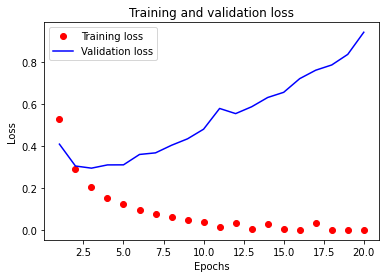

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc'])+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

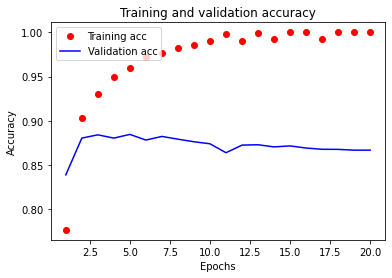

In [16]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc', color = 'red')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper left')
plt.show()